In [35]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import timm

root = "/Users/zyxu/Documents/py/FM_weights"
os.chdir(root)

In [36]:
model_mapping = {
  "vit_small_in1k": "vit_small_patch16_224.augreg_in1k",
  "vit_small_in21k": "vit_small_patch16_224.augreg_in21k_ft_in1k",
  "vit_tiny_in21k": "vit_tiny_patch16_224.augreg_in21k",
  "vit_tiny_patch16_384_in21k": "vit_tiny_patch16_384_in21k"
}

In [37]:
# model = "vit_tiny_patch16_384_in21k"
model_name = "vit_tiny_in21k"
# model_name = "vit_small_in21k"
# model_name = "vit_small_in1k"
loaded_tensor = torch.load(f'{root}/output/{model_name}/37_4sets_intermediate_outputs.pth')
print(loaded_tensor.shape)

torch.Size([13, 256, 197, 192])


In [38]:
from utils import intermdiates_to_pos_ctx
res = intermdiates_to_pos_ctx(loaded_tensor, normalize = False)
res.keys()

mu.shape torch.Size([13, 192])
expanded_mu_pos:  torch.Size([13, 197, 192])
expanded_mu_ctx:  torch.Size([13, 256, 192])
expanded_pos: torch.Size([13, 256, 197, 192]), expanded_ctx: torch.Size([13, 256, 197, 192]), expanded_mu_whole: torch.Size([13, 256, 197, 192])
resid: torch.Size([13, 256, 197, 192])
cvec: torch.Size([13, 256, 197, 192])


dict_keys(['mu', 'pos', 'ctx', 'resid', 'cvec'])

In [39]:
D = loaded_tensor.shape[-1]
D

192

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 47.91it/s]


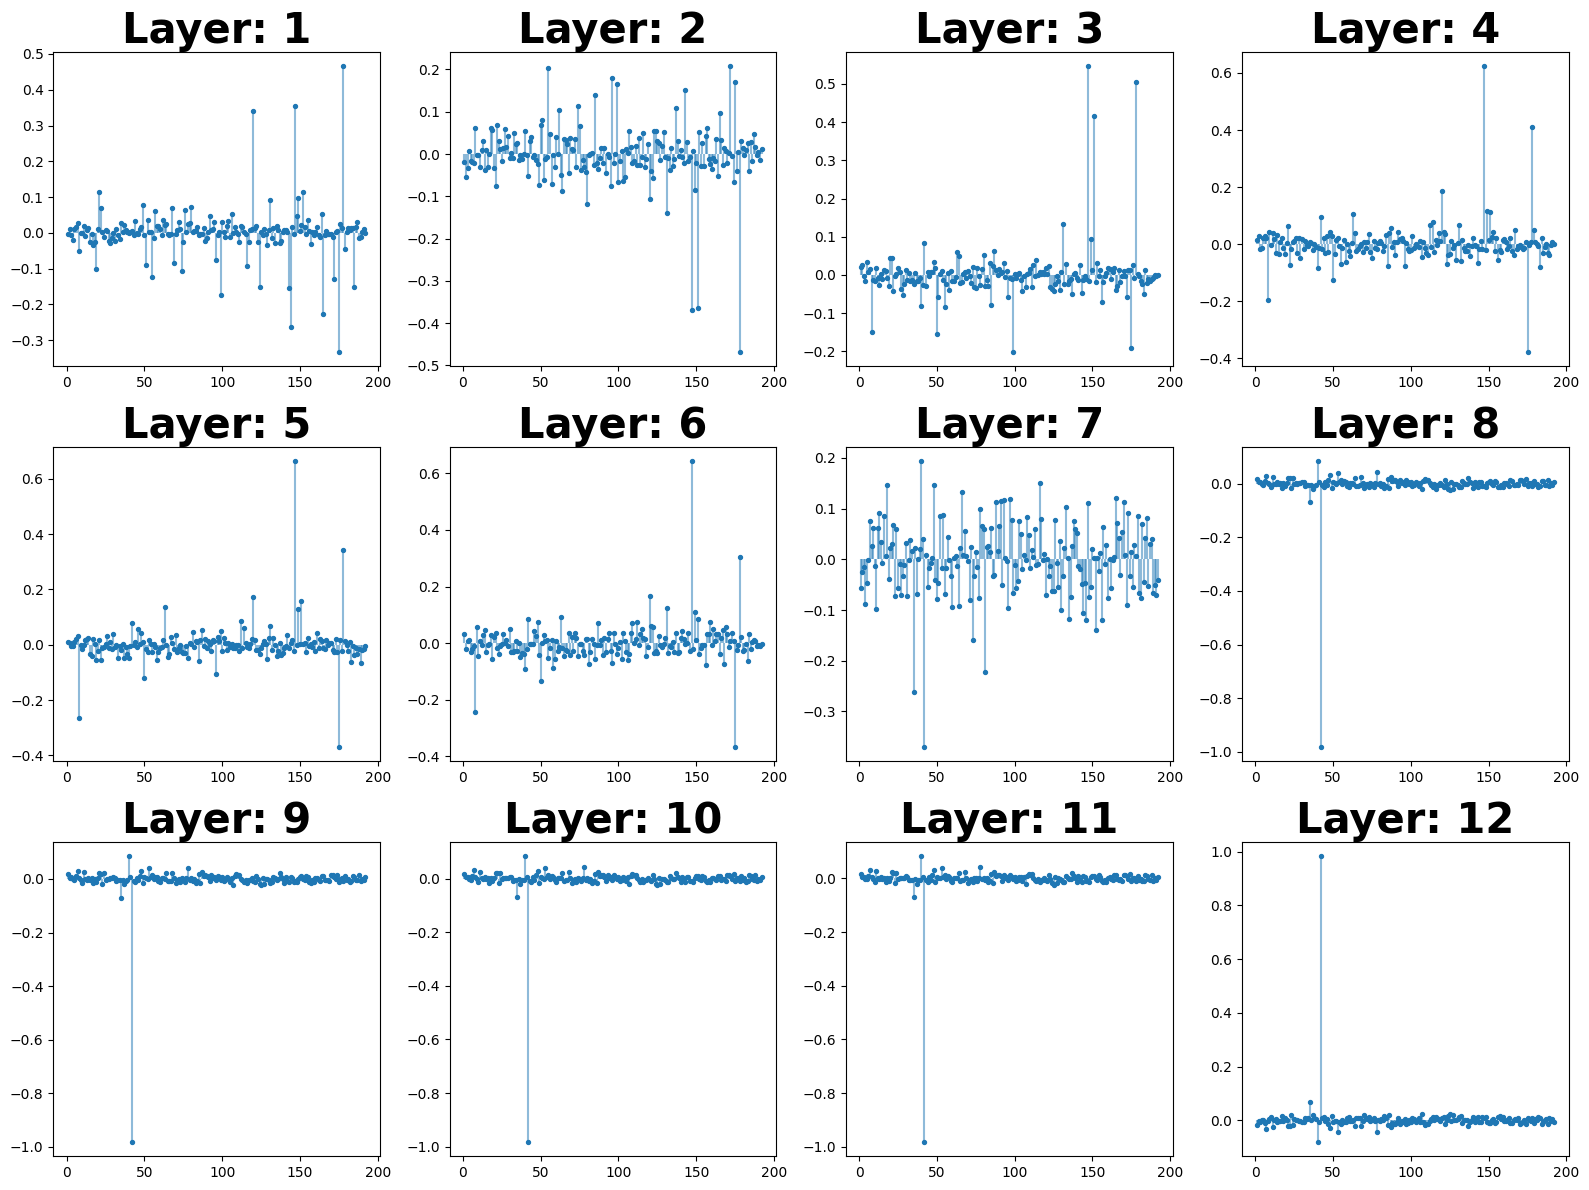

In [40]:
from utils import visz_pca_pos_cvec

PC = visz_pca_pos_cvec.plot1D(res['pos'].detach())

In [41]:
for i in range(1,12):
    print(f"=== layer {i}  ===")
    pc = PC[i]
    mean = np.mean(pc)
    # print("mean: ", mean)
    distances = (pc - mean) ** 2
    # print("distances: ", distances)
    # Sort the distances and get the indices of the two largest
    sorted_indices = np.argsort(distances)  # Sorts in ascending order

    outliers = sorted_indices[-3:]  # Take the last a few indices for the most extreme values
    print(outliers)

=== layer 1  ===
[119 146 177]
=== layer 2  ===
[150 146 177]
=== layer 3  ===
[150 177 146]
=== layer 4  ===
[174 177 146]
=== layer 5  ===
[177 174 146]
=== layer 6  ===
[177 174 146]
=== layer 7  ===
[80 34 41]
=== layer 8  ===
[34 39 41]
=== layer 9  ===
[34 39 41]
=== layer 10  ===
[34 39 41]
=== layer 11  ===
[34 39 41]


In [42]:
model_name

'vit_tiny_in21k'

In [43]:
model = timm.create_model(f"timm/{model_mapping[model_name]}", img_size=224,pretrained=True)
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()


In [44]:
model.pretrained_cfg

{'url': 'https://storage.googleapis.com/vit_models/augreg/Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0.npz',
 'hf_hub_id': 'timm/vit_tiny_patch16_224.augreg_in21k',
 'architecture': 'vit_tiny_patch16_224',
 'tag': 'augreg_in21k',
 'custom_load': True,
 'input_size': (3, 224, 224),
 'fixed_input_size': True,
 'interpolation': 'bicubic',
 'crop_pct': 0.9,
 'crop_mode': 'center',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'num_classes': 21843,
 'pool_size': None,
 'first_conv': 'patch_embed.proj',
 'classifier': 'head'}

In [45]:
# model.state_dict()["blocks.0.norm1.weight"]

In [46]:
# for key,val in model.state_dict().items():
#     if "norm" in key:
#         print(key)

In [47]:
model.blocks[0].norm1.weight.shape

torch.Size([192])

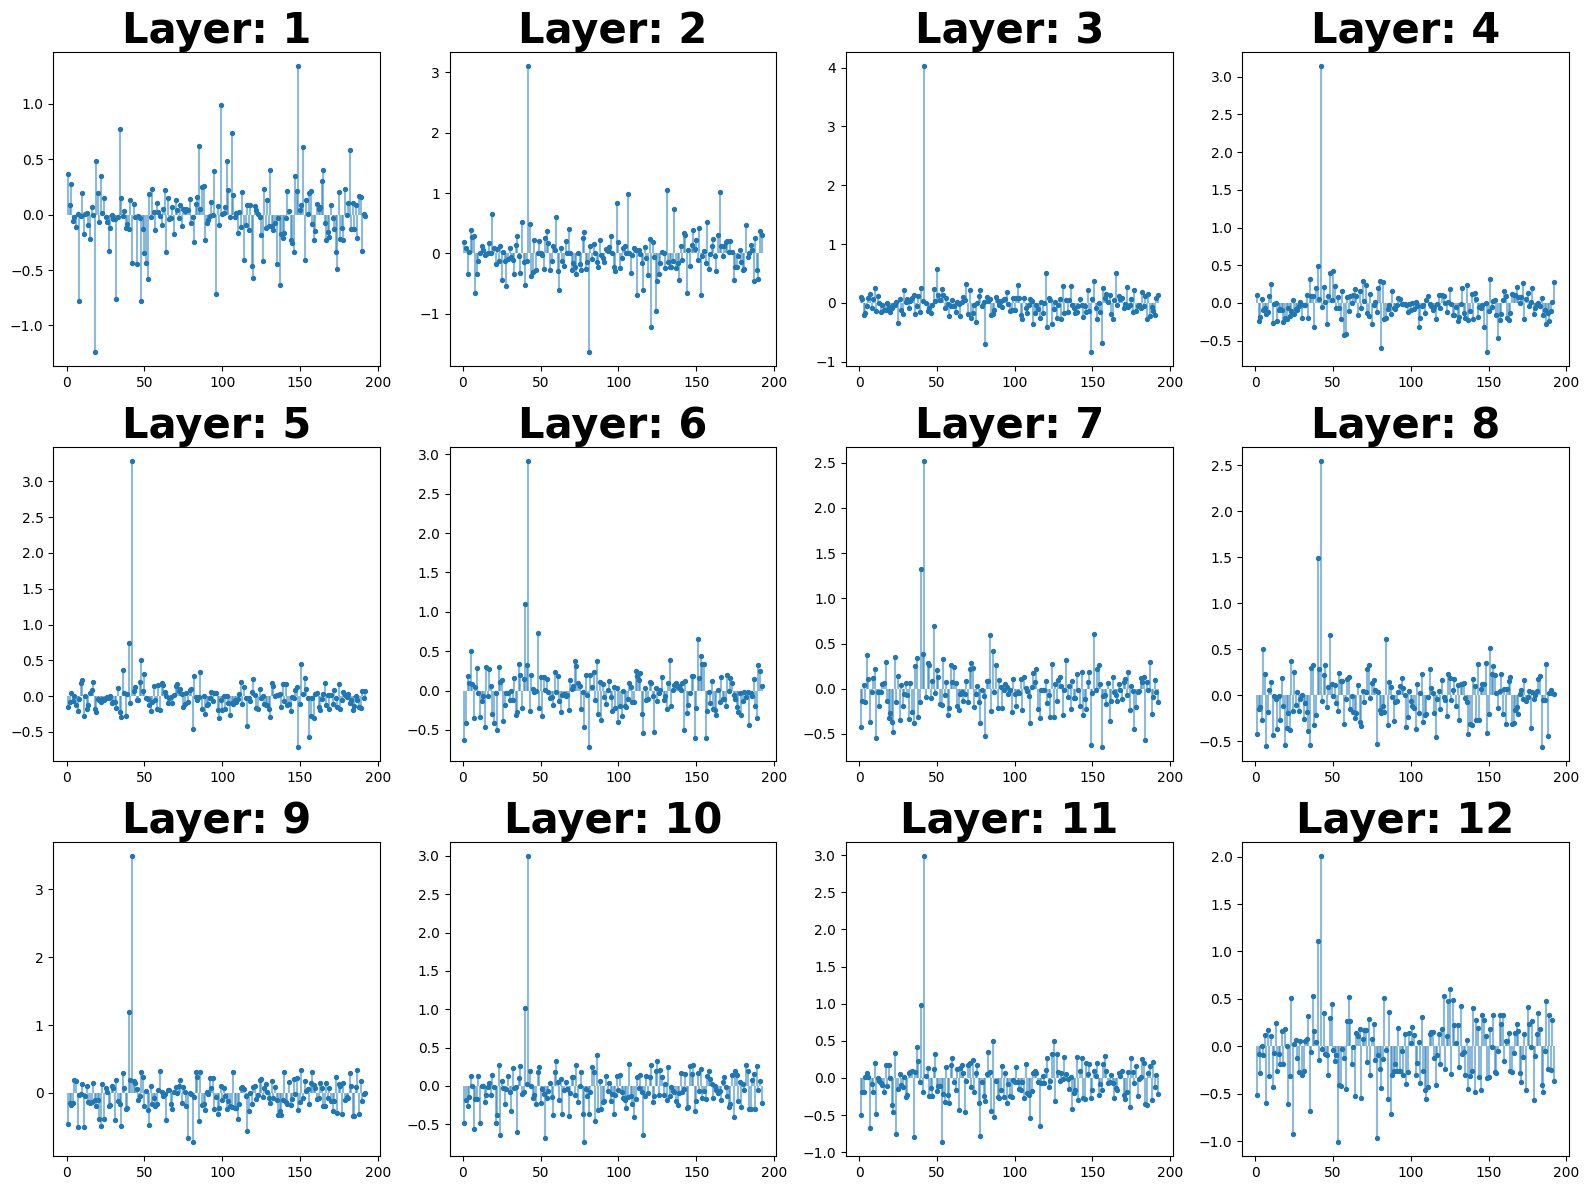

In [58]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, para_option="bias")

In [59]:
bias.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [60]:
largeLN = {}
for i in bias:
    # print(f"=== layer {i}  ===")
    pc = bias[i]
    mean = np.mean(pc)
    # print("mean: ", mean)
    distances = (pc - mean) ** 2
    # print("distances: ", distances)
    # Sort the distances and get the indices of the two largest
    sorted_indices = np.argsort(distances)  # Sorts in ascending order

    outliers = sorted_indices[-3:]  # Take the last two indices for the most extreme values
    # print(outliers)
    largeLN[i] = outliers

In [61]:
largeLN

{1: array([ 98,  17, 148]),
 2: array([120,  80,  41]),
 3: array([ 80, 148,  41]),
 4: array([ 80, 148,  41]),
 5: array([148,  39,  41]),
 6: array([47, 39, 41]),
 7: array([47, 39, 41]),
 8: array([47, 39, 41]),
 9: array([80, 39, 41]),
 10: array([77, 39, 41]),
 11: array([52, 39, 41]),
 12: array([52, 39, 41])}

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 67.85it/s]


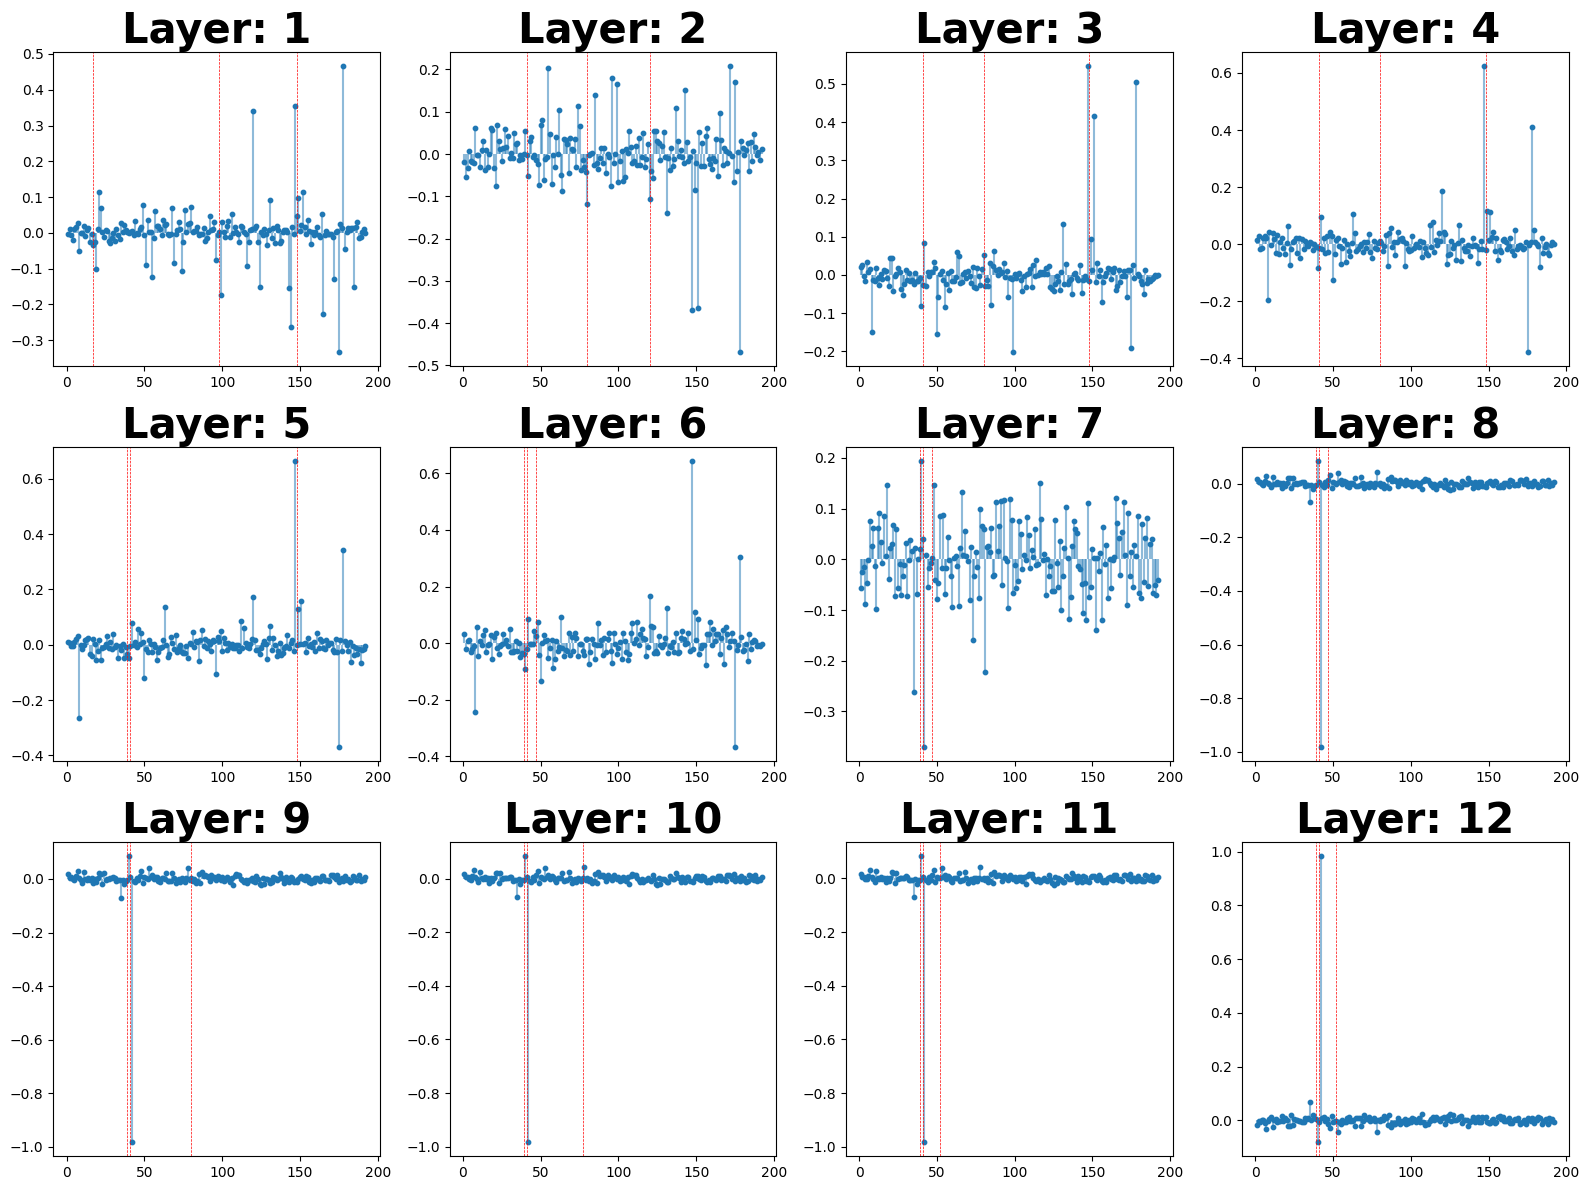

{1: array([-4.47432743e-03,  1.16041936e-02, -6.82929344e-03, -2.12881193e-02,
         1.19583681e-02,  1.50809996e-02,  2.69143190e-02, -5.05751818e-02,
         4.84281656e-04,  5.02250623e-04,  1.91611778e-02, -8.11930094e-03,
         7.24094315e-03,  1.36376461e-02, -2.49735508e-02, -3.92018352e-03,
        -3.32451202e-02, -2.62784436e-02, -1.02107935e-01,  9.41140391e-03,
         1.14758678e-01,  7.01230019e-02,  9.80948214e-04, -1.04130469e-02,
         7.55407242e-03,  6.13200106e-03, -2.24524625e-02, -2.91750357e-02,
        -1.57806315e-02, -1.79664069e-03, -2.35401876e-02,  1.06931096e-02,
        -6.39936840e-03, -1.68406758e-02,  2.70403102e-02,  2.31367559e-03,
         2.16201916e-02,  6.98739104e-03,  1.69865519e-03, -1.03507470e-03,
         1.92502094e-03,  6.24559633e-03, -5.86146582e-03,  3.19260061e-02,
         2.72118978e-05, -4.23228089e-03,  1.15262885e-02,  1.53326225e-02,
         7.71102756e-02, -4.77552507e-03, -8.89827684e-02,  3.51603925e-02,
         

In [62]:
visz_pca_pos_cvec.plot1D(res['pos'].detach(),point_size=10, largeLN=largeLN)

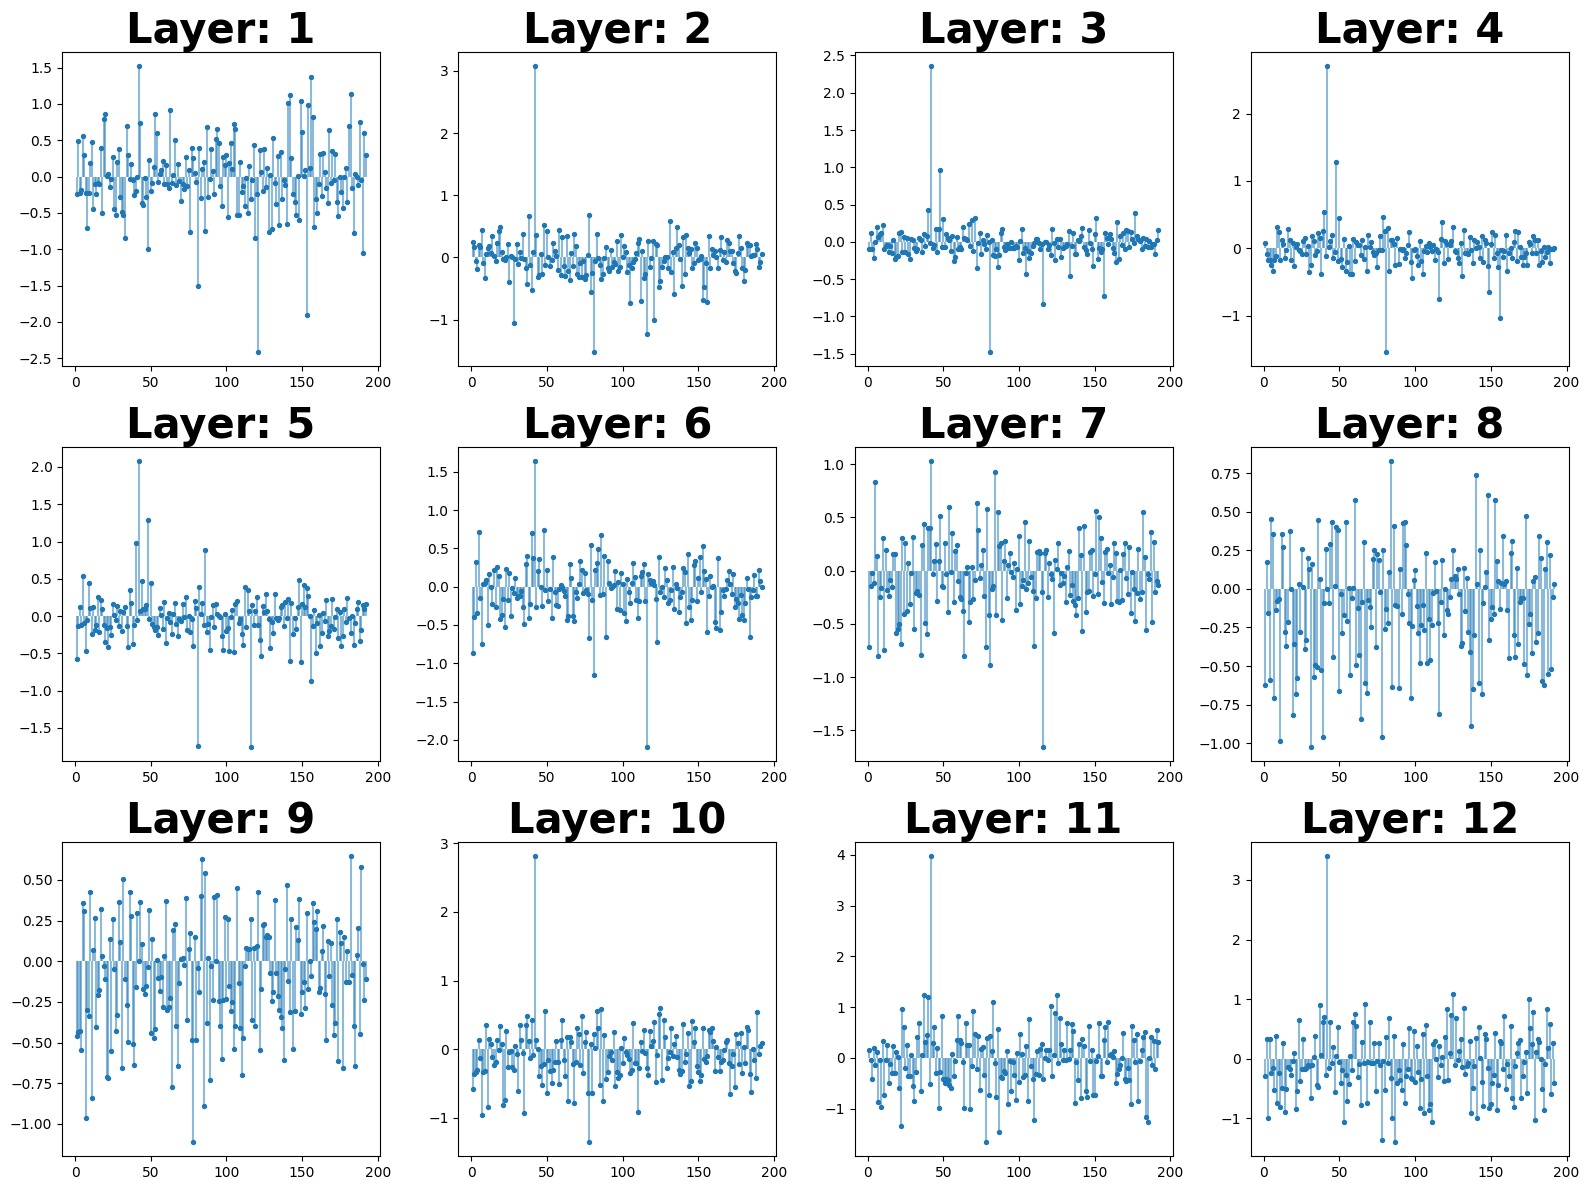

In [63]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, norm_option="mlp", para_option="bias")

In [64]:
for i in bias:
    print(f"=== layer {i}  ===")
    pc = bias[i]
    mean = np.mean(pc)
    # print("mean: ", mean)
    distances = (pc - mean) ** 2
    # print("distances: ", distances)
    # Sort the distances and get the indices of the two largest
    sorted_indices = np.argsort(distances)  # Sorts in ascending order

    outliers = sorted_indices[-3:]  # Take the last two indices for the most extreme values
    print(outliers)
    largeLN[i] = outliers

=== layer 1  ===
[ 41 152 120]
=== layer 2  ===
[115  80  41]
=== layer 3  ===
[47 80 41]
=== layer 4  ===
[47 80 41]
=== layer 5  ===
[ 80 115  41]
=== layer 6  ===
[ 80  41 115]
=== layer 7  ===
[ 83  41 115]
=== layer 8  ===
[10 30 83]
=== layer 9  ===
[84  6 77]
=== layer 10  ===
[ 6 77 41]
=== layer 11  ===
[86 77 41]
=== layer 12  ===
[77 86 41]
